Eğitim verisi : (7956, 3000)
Test verisi : (1990, 3000)
Model eğitimi başlıyor
Logistic Regression tamamlandı. Başarı %91.66 Süre : 0.05 sn
Naive Bayes tamamlandı. Başarı %87.59 Süre : 0.00 sn
Random Forest tamamlandı. Başarı %93.57 Süre : 5.65 sn
SONUÇ
                 Model  Accuracy      Time
2        Random Forest  0.935678  5.652224
0  Logistic Regression  0.916583  0.047835
1          Naive Bayes  0.875879  0.000000


C:\Users\ZWAGE\AppData\Local\Temp\ipykernel_7616\3155399854.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Accuracy" , y = "Model" , data = results_df , palette = "viridis")


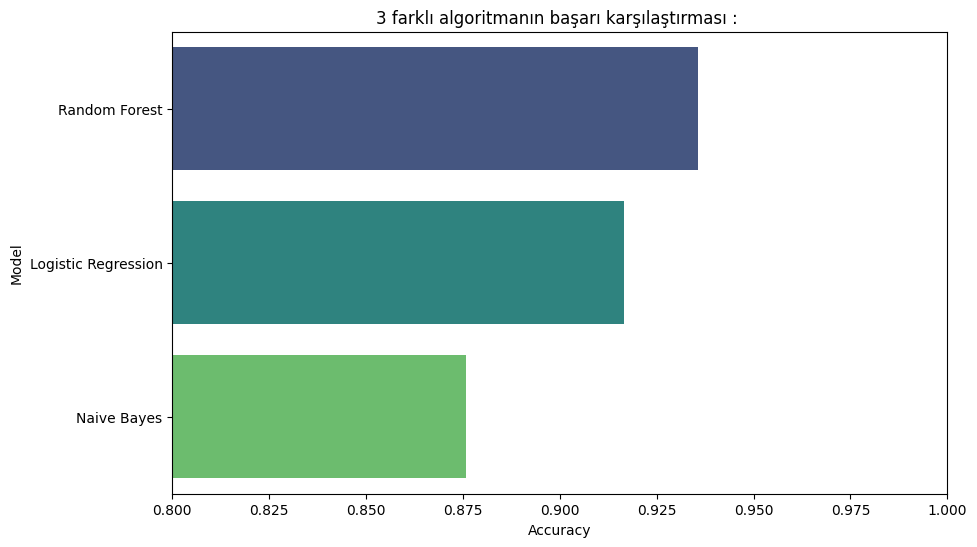

En iyi sonuç veren algoritma : Random Forest
              precision    recall  f1-score   support

       İnsan       0.92      0.96      0.94      1007
          AI       0.96      0.91      0.93       983

    accuracy                           0.94      1990
   macro avg       0.94      0.94      0.94      1990
weighted avg       0.94      0.94      0.94      1990



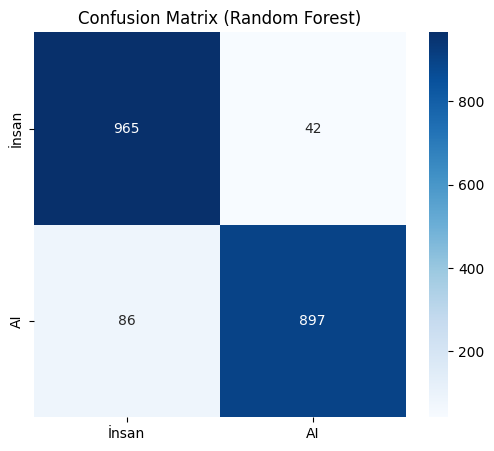

✅ Kaydedildi: model_logistic_regression.pkl
✅ Kaydedildi: model_naive_bayes.pkl
✅ Kaydedildi: model_random_forest.pkl


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import joblib

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("03_yorum_satirlari_silindi_final_dataset_merged.csv")

if 'class_name' in df.columns:
    label_map = {'Human' : 0 , 'AI' : 1}
    df['label'] = df['class_name'].map(label_map)


    X = df['clean_code'].astype(str)
    y = df['label']

    X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

    tfidf = TfidfVectorizer(max_features = 3000)
    X_train_vec = tfidf.fit_transform(X_train)
    X_test_vec = tfidf.transform(X_test)

    print(f"Eğitim verisi : {X_train_vec.shape}" )
    print(f"Test verisi : {X_test_vec.shape}" )


    models = {
        "Logistic Regression" : LogisticRegression(max_iter = 1000),
        "Naive Bayes" : MultinomialNB(),
        "Random Forest" : RandomForestClassifier(n_estimators = 100 , random_state = 42) 
    }


    results = []

    print("Model eğitimi başlıyor")

    for name , model in models.items():
        start_time = time.time()

        model.fit(X_train_vec , y_train)

        y_pred = model.predict(X_test_vec)

        acc = accuracy_score(y_test , y_pred)
        elapsed_time = time.time() - start_time

        print(f"{name} tamamlandı. Başarı %{acc*100:.2f} Süre : {elapsed_time:.2f} sn")

        results.append({
            "Model" : name,
            "Accuracy" : acc,
            "Time" : elapsed_time
        })

results_df = pd.DataFrame(results).sort_values(by = "Accuracy" , ascending=False)
print("SONUÇ")
print(results_df)

plt.figure(figsize=(10,6))
sns.barplot(x = "Accuracy" , y = "Model" , data = results_df , palette = "viridis")
plt.title("3 farklı algoritmanın başarı karşılaştırması : ")
plt.xlim(0.8 , 1.0)
plt.show()

best_model_name = results_df.iloc[0]['Model']
print(f"En iyi sonuç veren algoritma : {best_model_name}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_vec)

print(classification_report(y_test , y_pred_best , target_names = ['İnsan' , 'AI']))

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test , y_pred_best)

sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues' , xticklabels=['İnsan' , 'AI'] , yticklabels=['İnsan' , 'AI'])
plt.title(f'Confusion Matrix ({best_model_name})')
plt.show()

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
for name, model in models.items():
    
    filename = f"model_{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)
    print(f"✅ Kaydedildi: {filename}")

In [3]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.9 MB 2.0 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/8.9 MB 1.5 MB/s eta 0:00:06
   ---- ----------------------------------- 1.0/8.9 MB 1.5 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/8.9 MB 1.2 MB/s eta 0:00:07
   ----- ---------------------------------- 1.3/8.9 MB 1.2 MB/s eta 0:00:07
   -------- ------------------------------- 1.8/8.9 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.1/8.9 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.9 MB 1.2 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.9 MB 1.2 MB/s eta 0:00:06
   ---------- ----------------------------- 2.4/8.9 MB 1.0 MB/s eta 0:00:07
   ----------- ------------------